In [219]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt 
import scipy.stats as stats 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer 
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder , PowerTransformer , StandardScaler 
from sklearn.experimental import enable_iterative_imputer
from sklearn.compose import ColumnTransformer
# import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [220]:
df = pd.read_csv('csv/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [221]:
df.isna().mean()*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [222]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [224]:
data =['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

In [225]:
x_train , x_test , y_train , y_test = train_test_split(df.drop('median_house_value',axis=1),df['median_house_value'],test_size=0.3,
                                                       random_state=42)
x_train.shape

x_test.isna().mean()*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        3.343023
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
dtype: float64

In [226]:
si = SimpleImputer()
x_train_im = si.fit_transform(x_train[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']])
x_test_im = si.transform(x_test[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']])



In [227]:
m = LinearRegression()
m.fit(x_train_im , y_train)
y_pred = m.predict(x_test_im)
r2_score(y_test,y_pred )

0.6303302015489878

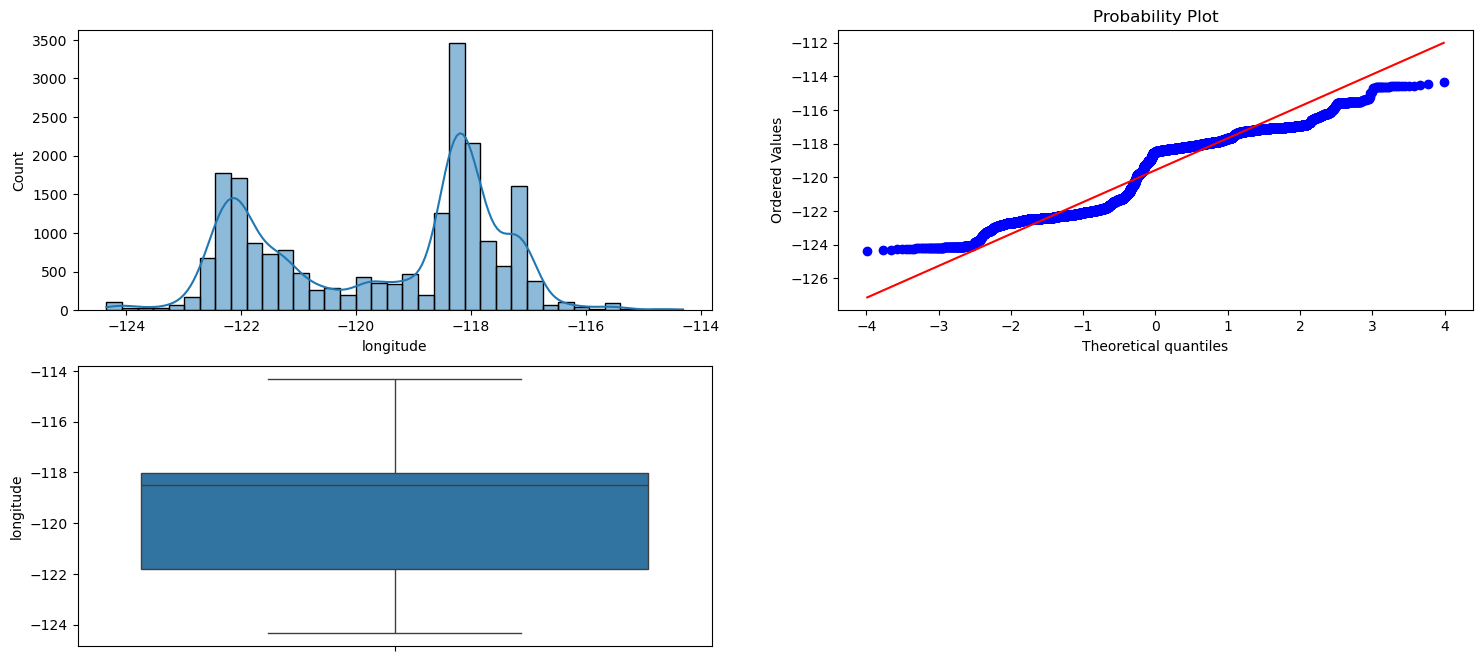

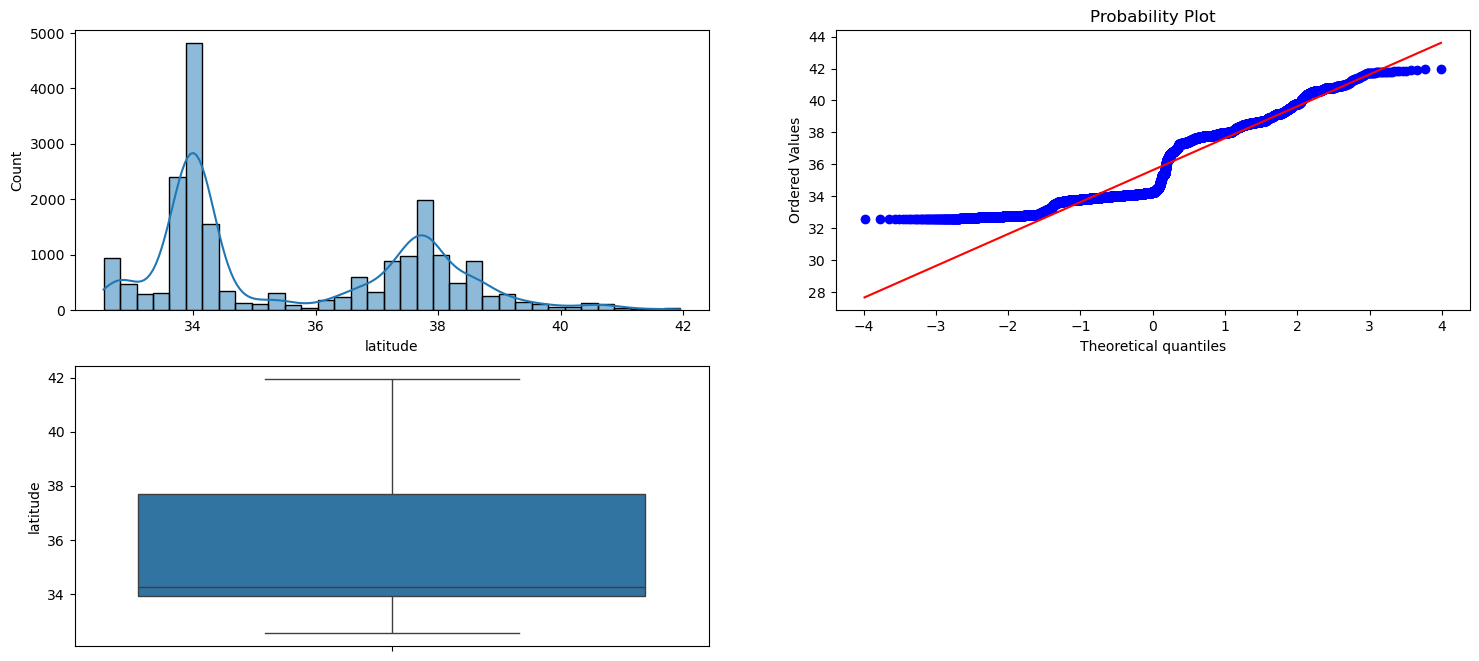

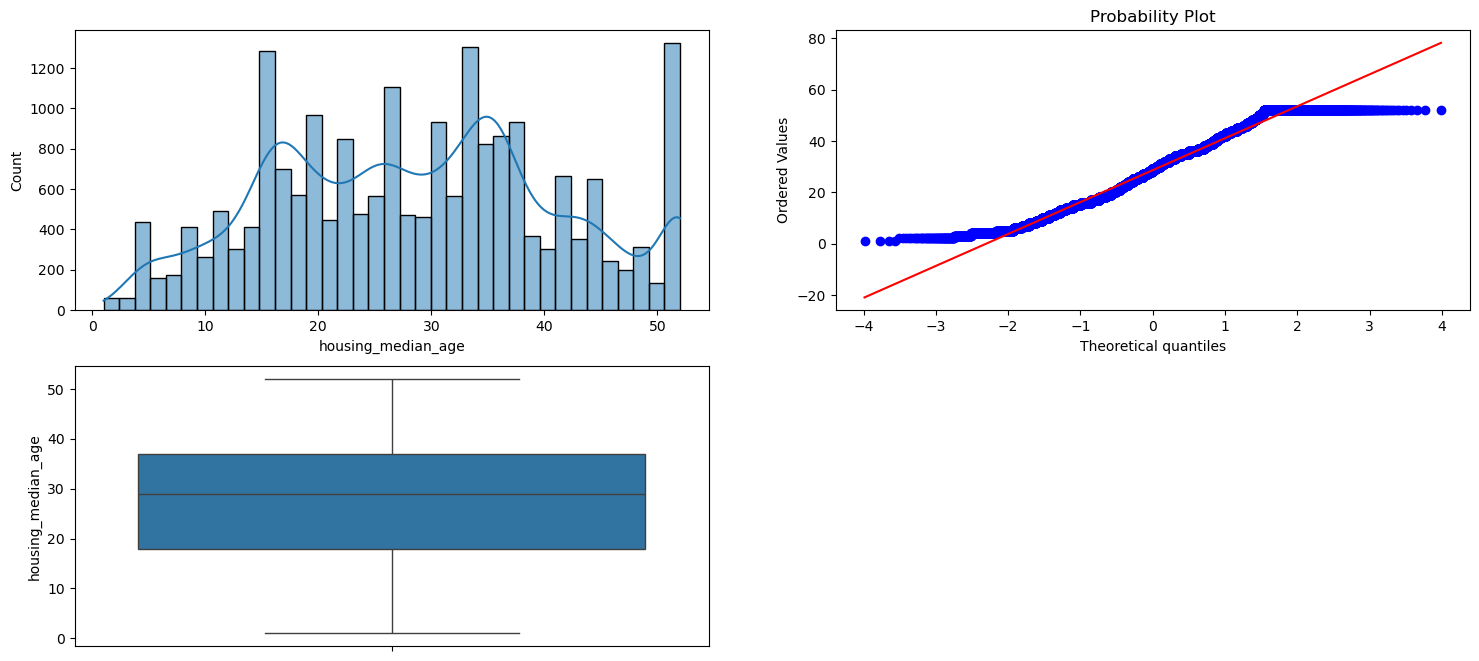

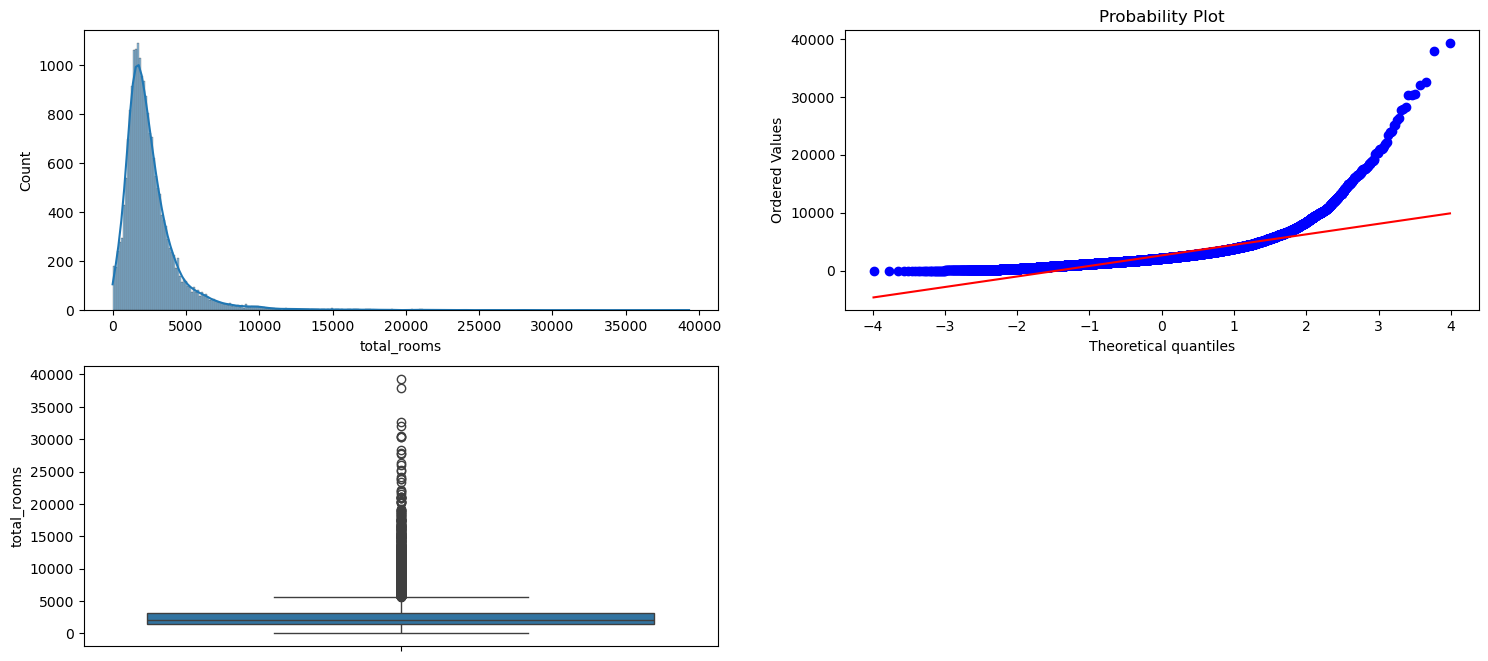

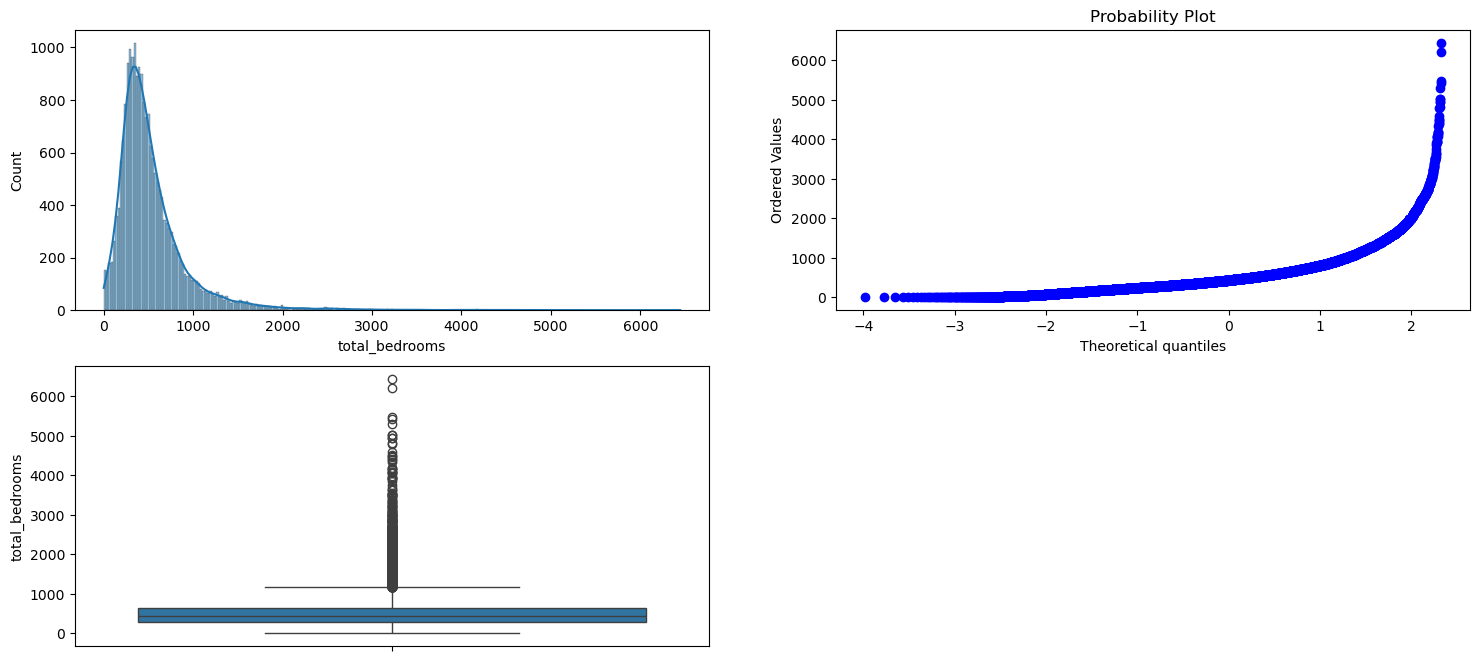

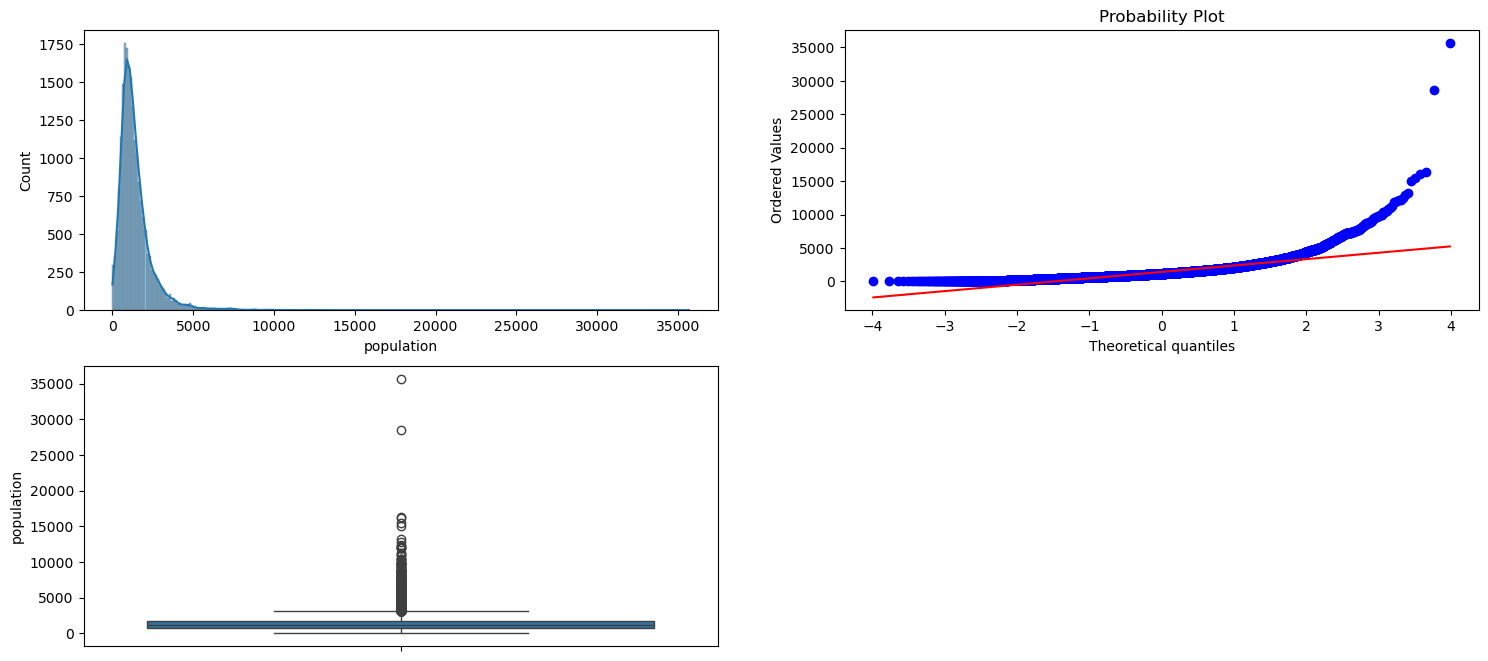

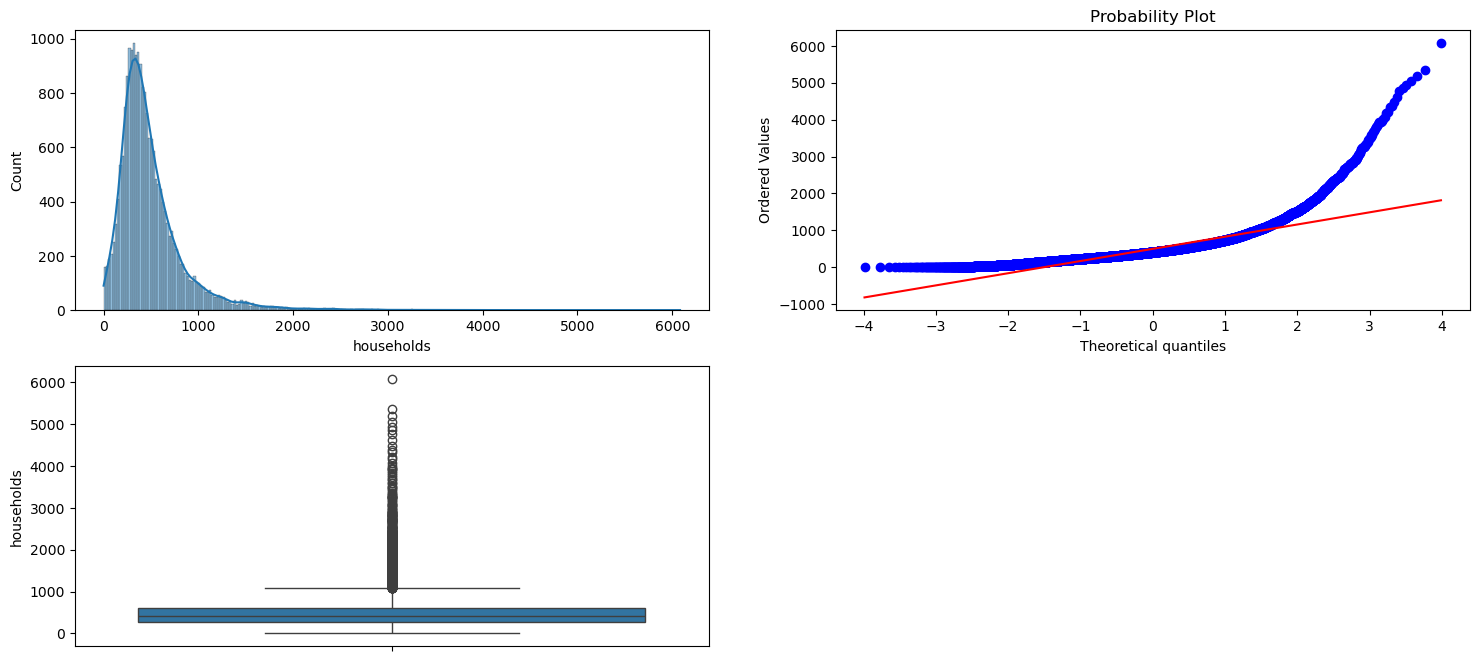

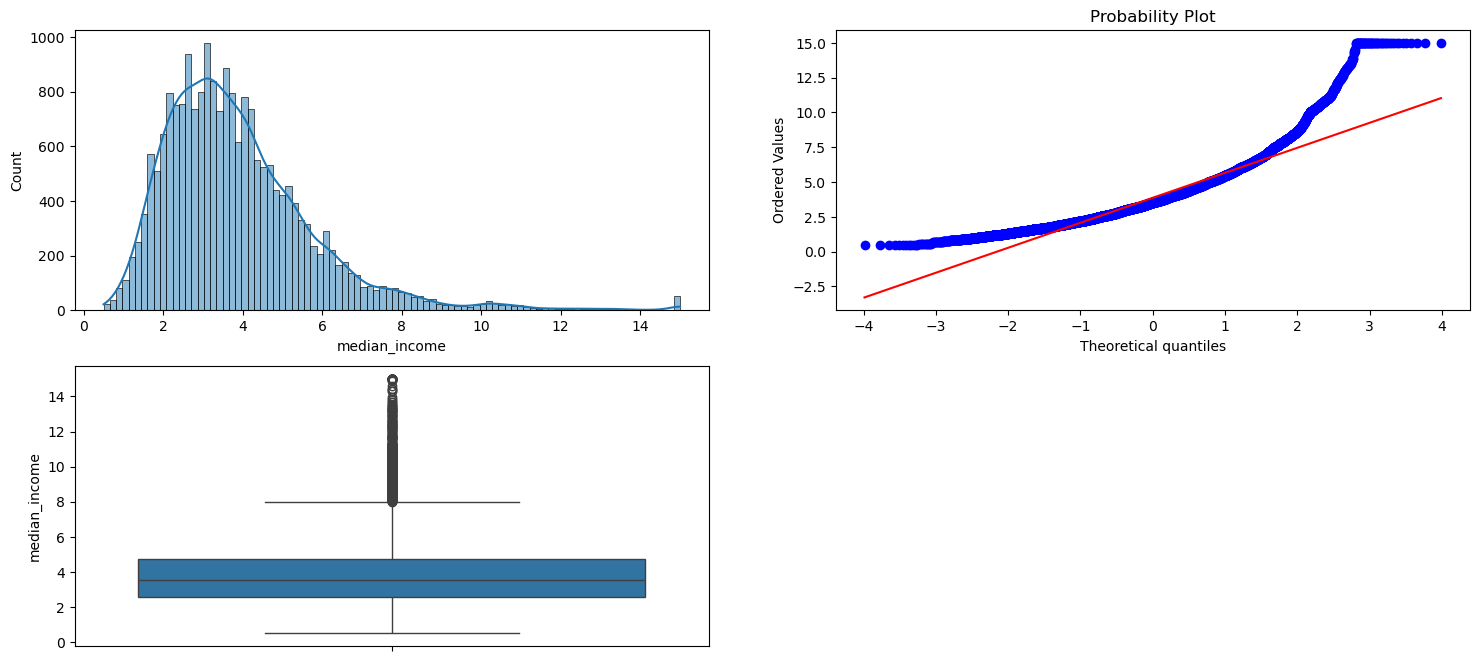

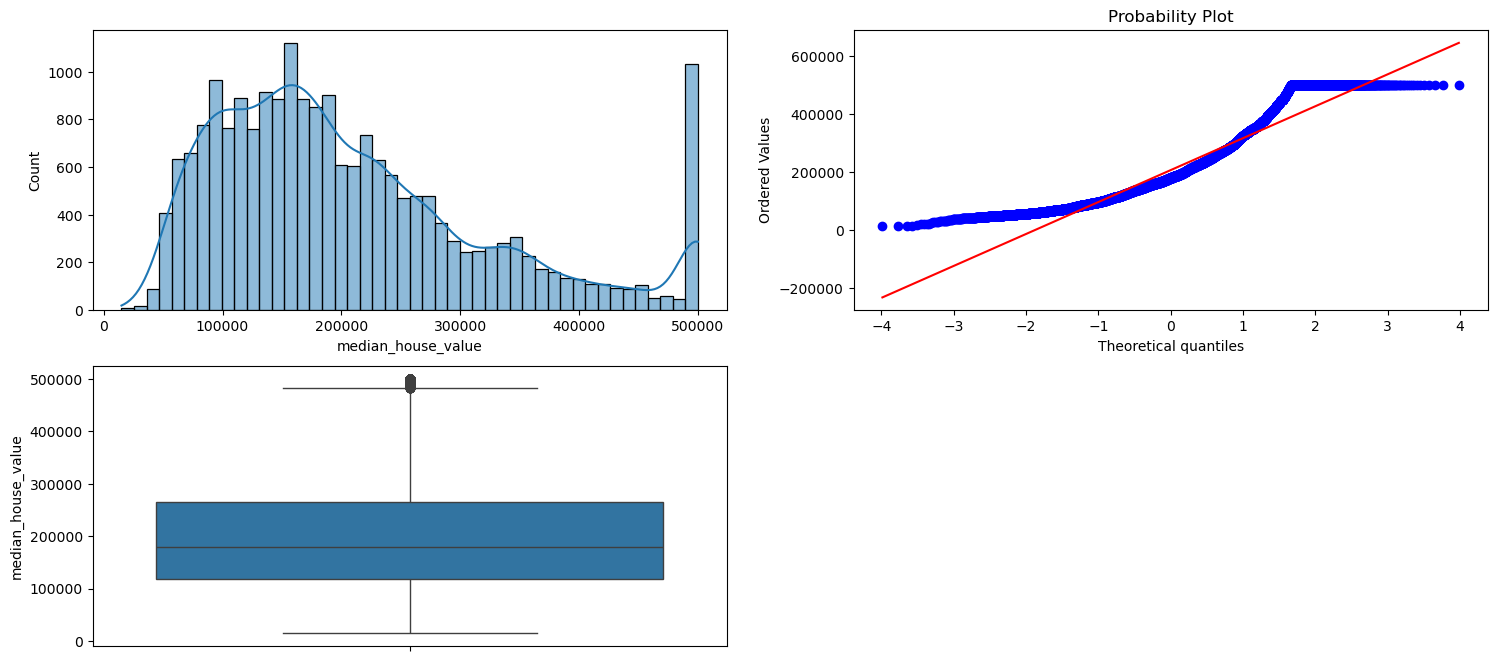

In [228]:
for cols in data:
    plt.figure(figsize=(18,8))
    
    plt.subplot(2,2,1)
    sns.histplot(df[cols], kde=True)
    
    plt.subplot(2,2,2)
    stats.probplot(df[cols],plot=plt)
    
    plt.subplot(2,2,3)
    sns.boxplot(df[cols])
    


### I get 75% data and 25% data for calculating IQR

In [229]:
per_dic = {}
for cols in data :
    per_dic[f'{cols}_75'] = df[cols].quantile(0.75)
    per_dic[f'{cols}_25'] = df[cols].quantile(0.25)

In [230]:
per_dic

{'longitude_75': np.float64(-118.01),
 'longitude_25': np.float64(-121.8),
 'latitude_75': np.float64(37.71),
 'latitude_25': np.float64(33.93),
 'housing_median_age_75': np.float64(37.0),
 'housing_median_age_25': np.float64(18.0),
 'total_rooms_75': np.float64(3148.0),
 'total_rooms_25': np.float64(1447.75),
 'total_bedrooms_75': np.float64(647.0),
 'total_bedrooms_25': np.float64(296.0),
 'population_75': np.float64(1725.0),
 'population_25': np.float64(787.0),
 'households_75': np.float64(605.0),
 'households_25': np.float64(280.0),
 'median_income_75': np.float64(4.74325),
 'median_income_25': np.float64(2.5633999999999997),
 'median_house_value_75': np.float64(264725.0),
 'median_house_value_25': np.float64(119600.0)}

In [231]:
IQR = {}
for cols in data:
    IQR[f'{cols}_IQR'] = per_dic[f'{cols}_75'] - per_dic[f'{cols}_25']

In [232]:
IQR

{'longitude_IQR': np.float64(3.789999999999992),
 'latitude_IQR': np.float64(3.780000000000001),
 'housing_median_age_IQR': np.float64(19.0),
 'total_rooms_IQR': np.float64(1700.25),
 'total_bedrooms_IQR': np.float64(351.0),
 'population_IQR': np.float64(938.0),
 'households_IQR': np.float64(325.0),
 'median_income_IQR': np.float64(2.17985),
 'median_house_value_IQR': np.float64(145125.0)}

In [233]:
upp_and_low = {}
for cols in data :
    upp_and_low[f'{cols}_upper'] = per_dic[f'{cols}_75'] + 1.5 * IQR[f'{cols}_IQR']
    upp_and_low[f'{cols}_lower'] = per_dic[f"{cols}_25"] - 1.5 * IQR[f'{cols}_IQR']

In [234]:
upp_and_low

{'longitude_upper': np.float64(-112.32500000000002),
 'longitude_lower': np.float64(-127.48499999999999),
 'latitude_upper': np.float64(43.38),
 'latitude_lower': np.float64(28.259999999999998),
 'housing_median_age_upper': np.float64(65.5),
 'housing_median_age_lower': np.float64(-10.5),
 'total_rooms_upper': np.float64(5698.375),
 'total_rooms_lower': np.float64(-1102.625),
 'total_bedrooms_upper': np.float64(1173.5),
 'total_bedrooms_lower': np.float64(-230.5),
 'population_upper': np.float64(3132.0),
 'population_lower': np.float64(-620.0),
 'households_upper': np.float64(1092.5),
 'households_lower': np.float64(-207.5),
 'median_income_upper': np.float64(8.013024999999999),
 'median_income_lower': np.float64(-0.7063750000000004),
 'median_house_value_upper': np.float64(482412.5),
 'median_house_value_lower': np.float64(-98087.5)}

In [235]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [236]:
df[df['total_rooms'] > upp_and_low['total_rooms_upper']] # in total rooms case you can see all the outliers 1287 outliers 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
101,-122.25,37.81,28.0,5806.0,1603.0,2563.0,1497.0,3.2177,273400.0,NEAR BAY
104,-122.26,37.81,34.0,5871.0,1914.0,2689.0,1789.0,2.8406,335700.0,NEAR BAY
185,-122.23,37.79,43.0,5963.0,1344.0,4367.0,1231.0,2.1917,112800.0,NEAR BAY
283,-122.16,37.79,22.0,12842.0,2048.0,4985.0,1967.0,5.9849,371000.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND
20567,-121.79,38.66,15.0,6809.0,1052.0,3060.0,1060.0,5.3064,165000.0,INLAND


In [237]:
upp_and_low['total_rooms_upper']

np.float64(5698.375)

In [238]:
df[df['total_bedrooms']>upp_and_low['total_bedrooms_upper']] # this is also outliers 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,NEAR BAY
100,-122.25,37.81,29.0,4656.0,1414.0,2304.0,1250.0,2.4912,257800.0,NEAR BAY
101,-122.25,37.81,28.0,5806.0,1603.0,2563.0,1497.0,3.2177,273400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20539,-121.71,38.56,20.0,8627.0,1516.0,4071.0,1466.0,4.2198,164100.0,INLAND
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND


In [239]:
df[df['population']>upp_and_low['population_upper']]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
185,-122.23,37.79,43.0,5963.0,1344.0,4367.0,1231.0,2.1917,112800.0,NEAR BAY
283,-122.16,37.79,22.0,12842.0,2048.0,4985.0,1967.0,5.9849,371000.0,NEAR BAY
460,-122.26,37.87,52.0,1087.0,371.0,3337.0,350.0,1.4012,175000.0,NEAR BAY
485,-122.26,37.86,35.0,5161.0,1744.0,3276.0,1742.0,1.6307,253600.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND
20604,-121.54,39.12,17.0,4251.0,899.0,3265.0,934.0,2.3496,65000.0,INLAND


In [240]:
df[df['median_income']>upp_and_low['median_income_upper']]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
131,-122.19,37.84,18.0,1617.0,210.0,533.0,194.0,11.6017,392600.0,NEAR BAY
134,-122.19,37.83,28.0,1326.0,184.0,463.0,190.0,8.2049,335200.0,NEAR BAY
135,-122.20,37.83,26.0,1589.0,223.0,542.0,211.0,8.4010,351200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0,<1H OCEAN
20428,-118.83,34.23,6.0,8803.0,1114.0,3385.0,1010.0,8.7288,425800.0,<1H OCEAN
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0,<1H OCEAN


In [241]:
df[df['households']>upp_and_low['households_upper']]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,NEAR BAY
100,-122.25,37.81,29.0,4656.0,1414.0,2304.0,1250.0,2.4912,257800.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20541,-121.70,38.54,13.0,6819.0,1158.0,2828.0,1115.0,4.6225,226500.0,INLAND
20543,-121.74,38.55,33.0,6861.0,1820.0,3717.0,1767.0,1.7311,182600.0,INLAND
20544,-121.76,38.55,23.0,8800.0,1857.0,6330.0,1832.0,2.0650,219400.0,INLAND
20563,-121.75,38.67,9.0,12139.0,2640.0,6837.0,2358.0,3.1250,132500.0,INLAND


In [242]:
upp_and_low

{'longitude_upper': np.float64(-112.32500000000002),
 'longitude_lower': np.float64(-127.48499999999999),
 'latitude_upper': np.float64(43.38),
 'latitude_lower': np.float64(28.259999999999998),
 'housing_median_age_upper': np.float64(65.5),
 'housing_median_age_lower': np.float64(-10.5),
 'total_rooms_upper': np.float64(5698.375),
 'total_rooms_lower': np.float64(-1102.625),
 'total_bedrooms_upper': np.float64(1173.5),
 'total_bedrooms_lower': np.float64(-230.5),
 'population_upper': np.float64(3132.0),
 'population_lower': np.float64(-620.0),
 'households_upper': np.float64(1092.5),
 'households_lower': np.float64(-207.5),
 'median_income_upper': np.float64(8.013024999999999),
 'median_income_lower': np.float64(-0.7063750000000004),
 'median_house_value_upper': np.float64(482412.5),
 'median_house_value_lower': np.float64(-98087.5)}

In [243]:
for cols in data:
    df[cols] = np.where(
        df[cols] > upp_and_low[f'{cols}_upper'],
        upp_and_low[f'{cols}_upper'],
        np.where(
            df[cols] < upp_and_low[f'{cols}_lower'],
            upp_and_low[f'{cols}_lower'],
            df[cols]
            ))

In [244]:
x_train.isna().mean()*100

longitude             0.0
latitude              0.0
housing_median_age    0.0
total_rooms           0.0
total_bedrooms        0.0
population            0.0
households            0.0
median_income         0.0
ocean_proximity       0.0
dtype: float64

In [245]:
x_test.isna().mean()*100

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        3.343023
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
dtype: float64

#### Here I m  going to create Pipeline for predection House price 


#### Pipeline_FLOW 

In [246]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7061,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312,<1H OCEAN
14689,-117.09,32.79,20.0,2183.0,534.0,999.0,496.0,2.8631,NEAR OCEAN
17323,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026,NEAR OCEAN
10056,-121.00,39.26,14.0,810.0,151.0,302.0,138.0,3.1094,INLAND
15750,-122.45,37.77,52.0,3188.0,708.0,1526.0,664.0,3.3068,NEAR BAY
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN


In [247]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14448 entries, 7061 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14448 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.1+ MB


In [248]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [249]:
cat_cols = ['ocean_proximity']
num_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [250]:
cat_pipe = Pipeline([
    ('Cat_data',OneHotEncoder(drop='first',sparse_output=False , handle_unknown='ignore'))
])

In [251]:
num_pipe = Pipeline([
    ('Misssing_Data',IterativeImputer(
        estimator=LinearRegression(),
        max_iter=20,
        random_state=0)),
    ('Convert_into_nd',PowerTransformer()),
    ('Scale_data',StandardScaler())
]) 

In [252]:
preprocessing = ColumnTransformer(transformers=[
    ('Cat_data',cat_pipe,cat_cols),
    ('num_data',num_pipe,num_cols)
])

In [253]:
pipe = Pipeline([
    ('Preprocessing', preprocessing),
    ('Model',LinearRegression())
])

In [254]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7061,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312,<1H OCEAN
14689,-117.09,32.79,20.0,2183.0,534.0,999.0,496.0,2.8631,NEAR OCEAN
17323,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026,NEAR OCEAN
10056,-121.00,39.26,14.0,810.0,151.0,302.0,138.0,3.1094,INLAND
15750,-122.45,37.77,52.0,3188.0,708.0,1526.0,664.0,3.3068,NEAR BAY
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,<1H OCEAN


In [260]:
y_train_log = np.log1p(y_train)
pipe.fit(x_train,y_train_log)

,steps,"[('Preprocessing', ...), ('Model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Cat_data', ...), ('num_data', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [261]:

y_pred = pipe.predict(x_test)
# y_test_log = np.log1p(y_test)

r2_score(y_test,y_pred)

-3.254643787377062